In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
medical_data = pd.read_csv("medical_cost_insurance.csv")
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data = medical_data

In [6]:
data.shape

(1338, 7)

In [7]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 1338
Number of columns 7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# check null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# overall statistic about data set
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# convert string value to numeric [Sex, smoker, region ]
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
data['sex'] = data['sex'].map({'Female':0, 'male':1})

In [14]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1.0,30.97,3,no,northwest,10600.5483
1334,18,NaN,31.92,0,no,northeast,2205.9808
1335,18,NaN,36.85,0,no,southeast,1629.8335
1336,21,NaN,25.80,0,no,southwest,2007.9450
1337,61,NaN,29.07,0,yes,northwest,29141.3603


In [15]:
data['smoker'] = data['smoker'].map({'no':0, 'yes':1})

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,1,southwest,16884.92400
1,18,1.0,33.770,1,0,southeast,1725.55230
2,28,1.0,33.000,3,0,southeast,4449.46200
3,33,1.0,22.705,0,0,northwest,21984.47061
4,32,1.0,28.880,0,0,northwest,3866.85520


In [17]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,1,1,16884.92400
1,18,1.0,33.770,1,0,2,1725.55230
2,28,1.0,33.000,3,0,2,4449.46200
3,33,1.0,22.705,0,0,3,21984.47061
4,32,1.0,28.880,0,0,3,3866.85520


In [65]:
# remove rows with any values that are not finite
data_new = data[np.isfinite(data).all(1)]
data = data_new

In [66]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [67]:
X = data.drop(['charges'], axis=1)

In [68]:
X

,age,sex,bmi,children,smoker,region
1,18,1.0,33.770,1,0,2
2,28,1.0,33.000,3,0,2
3,33,1.0,22.705,0,0,3
4,32,1.0,28.880,0,0,3
8,37,1.0,29.830,2,0,4
...,...,...,...,...,...,...
1324,31,1.0,25.935,1,0,3
1325,61,1.0,33.535,0,0,4
1327,51,1.0,30.030,1,0,2
1329,52,1.0,38.600,2,0,1


In [69]:
y = data['charges']
y

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
8        6406.41070
           ...     
1324     4239.89265
1325    13143.33665
1327     9377.90470
1329    10325.20600
1333    10600.54830
Name: charges, Length: 676, dtype: float64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [71]:
y_train

434      4243.59005
34      51194.55914
1108     2904.08800
817      3597.59600
1300    62592.87309
           ...     
146     40720.55105
224     19515.54160
528      8342.90875
872      5966.88740
212      3537.70300
Name: charges, Length: 540, dtype: float64

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
# Model Training
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [78]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})

In [79]:
df1

,Actual,lr,svm,rf,gr
1272,14478.33015,8899.782613,9343.680556,9718.118232,9712.845137
601,9174.13565,11226.446943,9371.778650,9659.798946,9242.490869
744,8827.20990,9253.271566,9366.828718,10981.143407,10408.526860
968,3279.86855,3168.350758,9285.611146,9223.733950,6403.392497
1132,20709.02034,16084.999284,9388.437195,12585.330248,12921.047450
...,...,...,...,...,...
107,3877.30425,5603.258096,9295.351280,4737.283427,4893.653320
408,6652.52880,5319.349895,9326.313163,7704.520150,6564.109962
1067,5757.41345,12367.063175,9336.430159,7821.014863,7009.888724
859,10965.44600,10546.660581,9387.128630,11276.617288,12861.461225


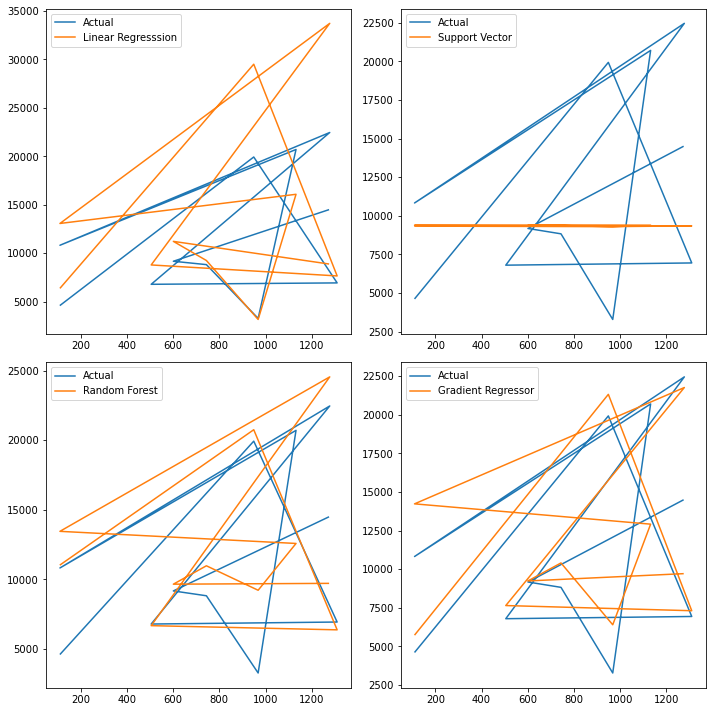

In [89]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['lr'].iloc[0:11], label = 'Linear Regresssion')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['svm'].iloc[0:11], label = 'Support Vector')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['rf'].iloc[0:11], label = 'Random Forest')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['gr'].iloc[0:11], label = 'Gradient Regressor')

plt.tight_layout()

plt.legend()




In [90]:
# evaluating the algorithm
from sklearn import metrics

In [91]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [94]:
print('Score1 result',score1*100)
print('Score1 result',score2*100)
print('Score1 result',score3*100)
print('Score1 result',score4*100)

Score1 result 79.63380131367751
Score1 result -10.886235494415475
Score1 result 90.10372504110913
Score1 result 89.28947177564814


In [95]:
# mean absolute error
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [96]:
print(s1, s2, s3, s4)

3946.4520134019967 8339.601692792989 2222.5791564022074 2381.1883033605513


# Result :- RandomForstRegressor perform best prediction.